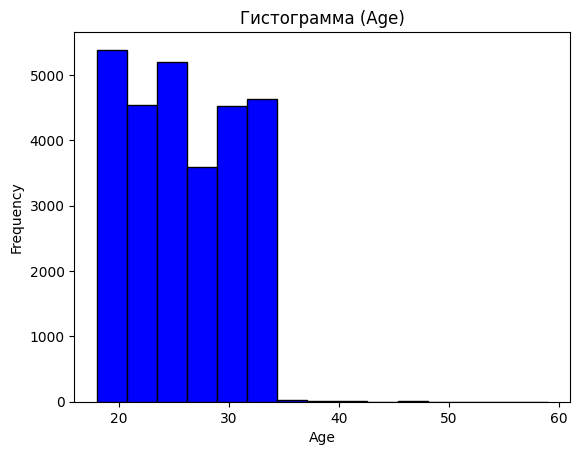

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Загрузка данных
data = pd.read_csv('sdd.csv')
# Построение гистограммы для столбца Amount
import matplotlib.pyplot as plt

plt.hist(data['Age'], bins=15, color='blue', edgecolor='black')
plt.title('Гистограмма (Age)')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


In [110]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Загрузка данных
data = pd.read_csv('sdd.csv')

# Очистка данных от null значений
data_cleaned = data.dropna()

# Кодирование категориальных признаков
label_encoders = {}
categorical_columns = ['Gender', 'City', 'Profession', 'Dietary Habits', 'Have you ever had suicidal thoughts ?',
                       'Family History of Mental Illness', 'Sleep Duration', 'Degree']

for column in categorical_columns:
    label_encoders[column] = LabelEncoder()
    data_cleaned[column] = label_encoders[column].fit_transform(data_cleaned[column])

# проверка, что вре работает
data_cleaned.head(15)

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,1,33.0,51,12,5.0,0.0,8.97,2.0,0.0,0,0,4,1,3.0,1.0,0,1
1,8,0,24.0,5,12,2.0,0.0,5.90,5.0,0.0,0,1,11,0,3.0,2.0,1,0
2,26,1,31.0,44,12,3.0,0.0,7.03,5.0,0.0,2,0,6,0,9.0,1.0,1,0
3,30,0,28.0,49,12,3.0,0.0,5.59,2.0,0.0,1,1,8,1,4.0,5.0,1,1
4,32,0,25.0,18,12,4.0,0.0,8.13,3.0,0.0,0,1,17,1,1.0,1.0,0,0
5,33,1,29.0,39,12,2.0,0.0,5.70,3.0,0.0,2,0,27,0,4.0,1.0,0,0
6,52,1,30.0,46,12,3.0,0.0,9.54,4.0,0.0,1,0,11,0,1.0,2.0,0,0
7,56,0,30.0,8,12,2.0,0.0,8.04,4.0,0.0,2,3,0,0,0.0,1.0,1,0
8,59,1,28.0,33,12,3.0,0.0,9.79,1.0,0.0,1,1,3,1,12.0,3.0,0,1
9,62,1,31.0,37,12,2.0,0.0,8.38,3.0,0.0,2,1,12,1,2.0,5.0,0,1


In [51]:
# Удаление ненужных столбцов
columns_to_drop = ['id', 'Work Pressure', 'Profession']  # Укажите столбцы, которые хотите удалить
data_cleaned = data_cleaned.drop(columns=columns_to_drop)


In [52]:
sleep_column = data_cleaned['Sleep Duration'].unique()
print(sleep_column)

[0 2 1 3 4]


# Разделение на выборки

In [53]:

# Целевая переменная (Age)
y = data_cleaned['Age']

# Признаки (удаляем столбец Age из данных)
X = data_cleaned.drop(columns=['Age'])

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Вывод размеров выборок
print(f"Размер обучающей выборки: {X_train.shape}, {y_train.shape}")
print(f"Размер тестовой выборки: {X_test.shape}, {y_test.shape}")
print(X_train.head())
print(y_train.head())

Размер обучающей выборки: (22318, 14), (22318,)
Размер тестовой выборки: (5580, 14), (5580,)
       Gender  City  Academic Pressure  CGPA  Study Satisfaction  \
26046       1    44                2.0  8.17                 4.0   
20525       1    38                5.0  5.74                 2.0   
15397       0    20                3.0  9.63                 4.0   
14999       0    25                1.0  5.57                 1.0   
24414       0    13                0.0  5.47                 2.0   

       Job Satisfaction  Sleep Duration  Dietary Habits  Degree  \
26046               0.0               2               0      22   
20525               0.0               1               1      11   
15397               0.0               1               1      27   
14999               0.0               1               3       0   
24414               0.0               2               3       2   

       Have you ever had suicidal thoughts ?  Work/Study Hours  \
26046                        

In [107]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score


linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Предсказание на тестовой выборке
y_pred_linear = linear_model.predict(X_test)

# Оценка модели
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

print("Линейная регрессия:")
print(f"Среднеквадратичная ошибка (MSE): {mse_linear}")
print(f"Коэффициент детерминации (R^2): {r2_linear}")

from sklearn.metrics import mean_absolute_error

# Вывод результата
print(f"Средняя абсолютная ошибка (MAE): {mae_poly}")


Линейная регрессия:
Среднеквадратичная ошибка (MSE): 23.359579962159597
Коэффициент детерминации (R^2): 0.0498653533592911
Средняя абсолютная ошибка (MAE): 4.108896461296449


In [106]:
# Преобразование признаков в полиномиальные
degree = 2  # Степень полинома
poly = PolynomialFeatures(degree=degree)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Создание и обучение модели полиномиальной регрессии
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)

# Предсказание на тестовой выборке
y_pred_poly = poly_model.predict(X_test_poly)

# Оценка модели
mse_poly = mean_squared_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)

print(f"\nПолиномиальная регрессия (степень {degree}):")
print(f"Среднеквадратичная ошибка (MSE): {mse_poly}")
print(f"Коэффициент детерминации (R^2): {r2_poly}")
# Вычисление MAE
mae_poly = mean_absolute_error(y_test, y_pred_poly)

from sklearn.metrics import mean_absolute_error

# Вывод результата
print(f"Средняя абсолютная ошибка (MAE): {mae_poly}")


Полиномиальная регрессия (степень 2):
Среднеквадратичная ошибка (MSE): 23.377189681405756
Коэффициент детерминации (R^2): 0.04914909029289616
Средняя абсолютная ошибка (MAE): 4.108896461296449


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, r2_score
from sklearn.utils import check_random_state, check_array

from sklearn.svm import LinearSVC, LinearSVR, SVC, SVR, _libsvm
from sklearn.datasets import load_iris, load_diabetes, load_wine, load_breast_cancer

linear_svc = LinearSVC(random_state=0)
linear_svc.fit(X_train, y_train)

linear_svc_pred_res = linear_svc.predict(X_test)
linear_svc_accuracy = accuracy_score(y_test, linear_svc_pred_res)

print(f'LinearSVC accuracy: {linear_svc_accuracy:}')
print(linear_svc_pred_res)



LinearSVC accuracy: 0.17043010752688173
[24. 20. 18. ... 29. 28. 24.]


In [57]:
from sklearn import svm

regr = svm.SVR()
regr.fit(X_train, y_train)

svr_pred_res = regr.predict(X_test)



In [58]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse_svr = mean_squared_error(y_test, svr_pred_res)
mae_svr = mean_absolute_error(y_test, svr_pred_res)
r2_svr = r2_score(y_test, svr_pred_res)

print("Метрики для SVM-регрессии:")
print(f"Среднеквадратичная ошибка (MSE): {mse_svr}")
print(f"Средняя абсолютная ошибка (MAE): {mae_svr}")
print(f"Коэффициент детерминации (R^2): {r2_svr}")

Метрики для SVM-регрессии:
Среднеквадратичная ошибка (MSE): 17.358684123630958
Средняя абсолютная ошибка (MAE): 3.164260323372196
Коэффициент детерминации (R^2): 0.29394761238553546


In [59]:
from sklearn import tree

clf = tree.DecisionTreeRegressor()
clf = clf.fit(X_train, y_train)



In [61]:
# Предсказания модели
y_pred = clf.predict(X_test)
# Метрики
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R² Score: {r2}")

Mean Absolute Error (MAE): 3.9059139784946235
Mean Squared Error (MSE): 27.395878136200718
Root Mean Squared Error (RMSE): 5.234107195711673
R² Score: -0.11430826386933601


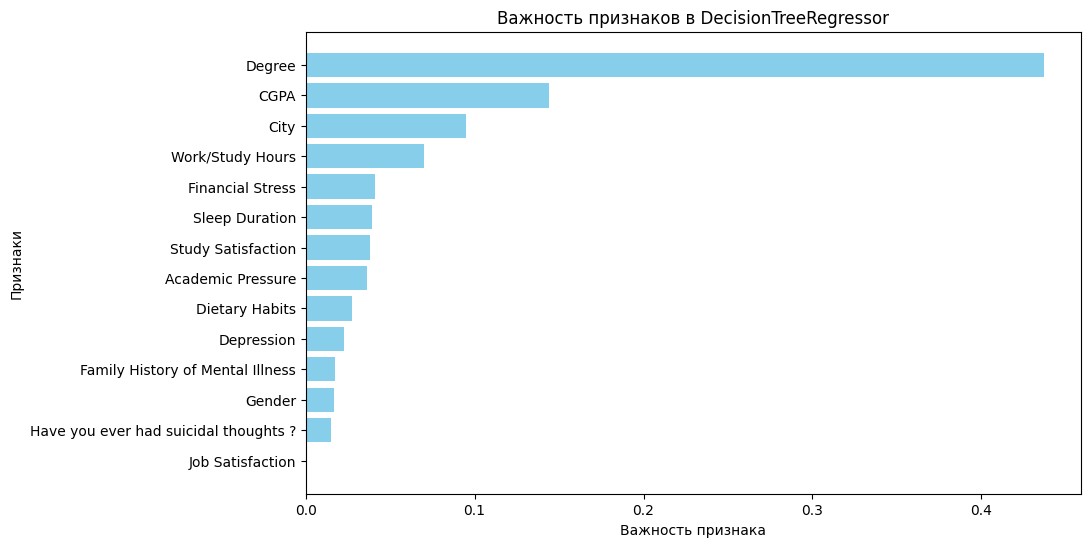

In [62]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Получение важности признаков
feature_importances = clf.feature_importances_

# Если у вас есть названия признаков
feature_names = X_train.columns if isinstance(X_train, pd.DataFrame) else [f"Feature {i}" for i in range(X_train.shape[1])]

# Создание DataFrame для удобства
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Построение графика
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Важность признака')
plt.ylabel('Признаки')
plt.title('Важность признаков в DecisionTreeRegressor')
plt.gca().invert_yaxis()  # Инвертируем ось Y для лучшей читаемости
plt.show()

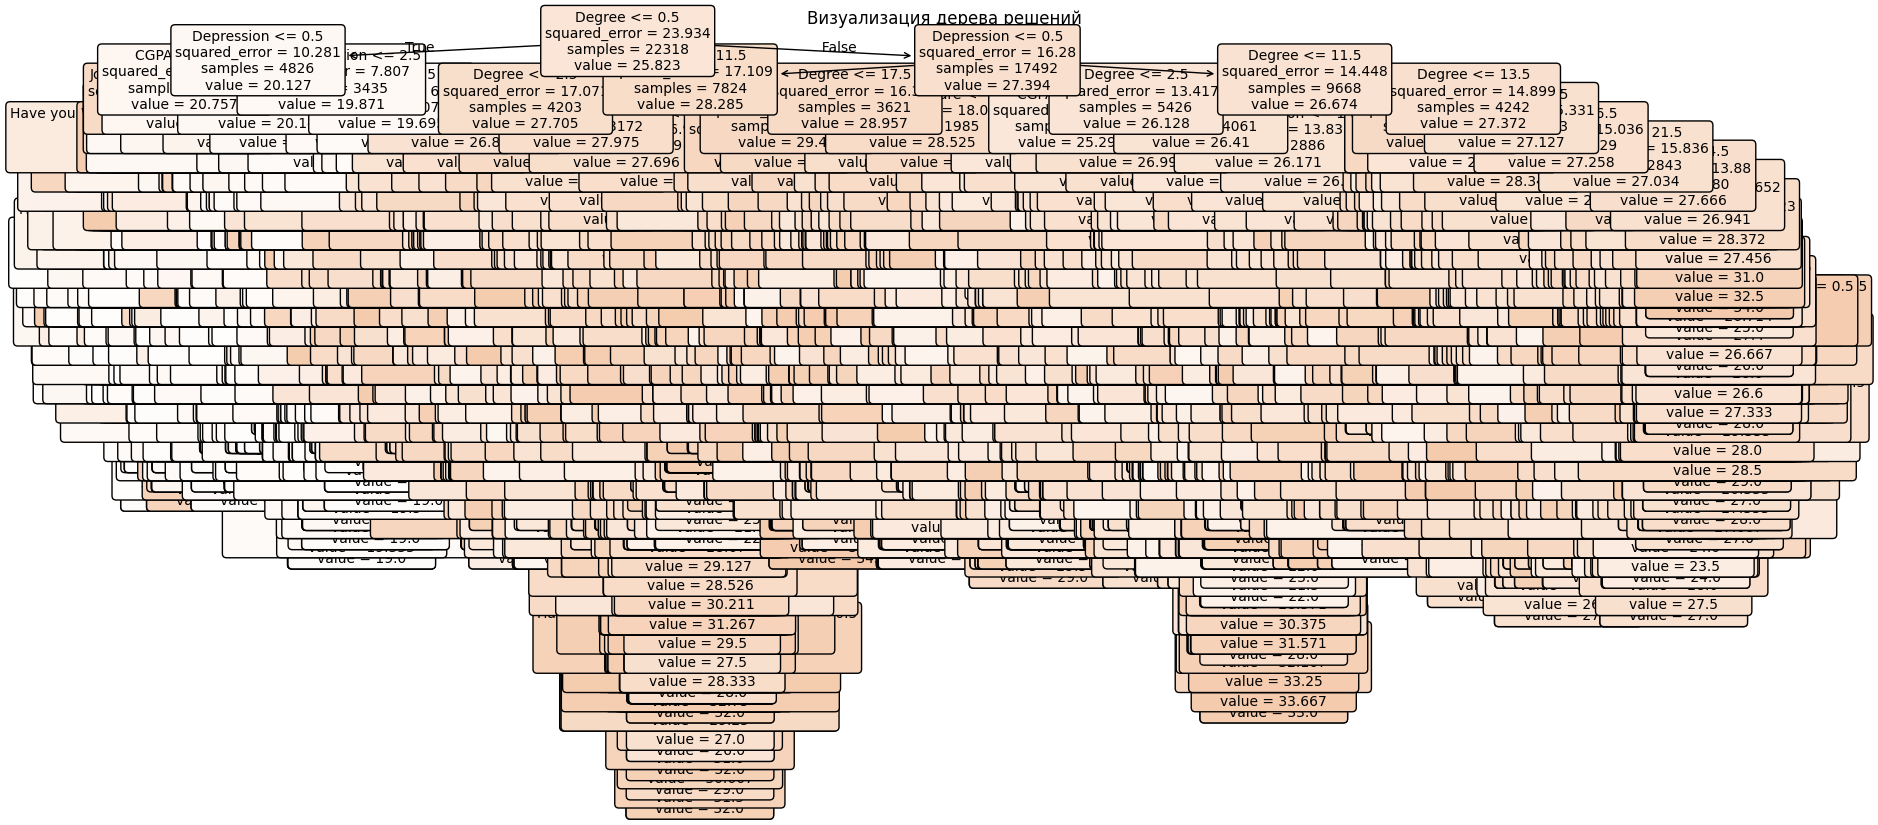

In [63]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Визуализация дерева решений
plt.figure(figsize=(20, 10))  # Увеличиваем размер графика для лучшей читаемости
plot_tree(
    clf,  # Ваш обученный DecisionTreeRegressor
    feature_names=X_train.columns if isinstance(X_train, pd.DataFrame) else None,  # Названия признаков
    filled=True,  # Раскрашиваем узлы в зависимости от значений
    rounded=True,  # Закругляем узлы для лучшей читаемости
    fontsize=10  # Размер шрифта
)
plt.title("Визуализация дерева решений")
plt.show()

In [97]:

columns_to_drop = ['id', 'Study Satisfaction', 'Profession', 'Academic Pressure', 'Work Pressure', 
                   'Job Satisfaction', 'Dietary Habits', 'Have you ever had suicidal thoughts ?',
                   'Family History of Mental Illness','Financial Stress', 'Work/Study Hours',
                   'City', 'CGPA', 'Degree']  
data_cleaned1 = data_cleaned.drop(columns=columns_to_drop)


In [98]:

# Целевая переменная (Age)
y = data_cleaned1['Age']

# Признаки (удаляем столбец Age из данных)
X = data_cleaned1.drop(columns=['Age'])

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Вывод размеров выборок
print(f"Размер обучающей выборки: {X_train.shape}, {y_train.shape}")
print(f"Размер тестовой выборки: {X_test.shape}, {y_test.shape}")
print(X_train.head())
print(y_train.head())

Размер обучающей выборки: (22318, 3), (22318,)
Размер тестовой выборки: (5580, 3), (5580,)
       Gender  Sleep Duration  Depression
26046       1               2           0
20525       1               1           1
15397       0               1           1
14999       0               1           0
24414       0               2           0
26046    34.0
20525    23.0
15397    25.0
14999    20.0
24414    30.0
Name: Age, dtype: float64


In [99]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score


linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Предсказание на тестовой выборке
y_pred_linear = linear_model.predict(X_test)

# Оценка модели
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

print("Линейная регрессия:")
print(f"Среднеквадратичная ошибка (MSE): {mse_linear}")
print(f"Коэффициент детерминации (R^2): {r2_linear}")



Линейная регрессия:
Среднеквадратичная ошибка (MSE): 23.359579962159597
Коэффициент детерминации (R^2): 0.0498653533592911


In [100]:
# Преобразование признаков в полиномиальные
degree = 2  # Степень полинома
poly = PolynomialFeatures(degree=degree)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Создание и обучение модели полиномиальной регрессии
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)

# Предсказание на тестовой выборке
y_pred_poly = poly_model.predict(X_test_poly)

# Оценка модели
mse_poly = mean_squared_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)

print(f"\nПолиномиальная регрессия (степень {degree}):")
print(f"Среднеквадратичная ошибка (MSE): {mse_poly}")
print(f"Коэффициент детерминации (R^2): {r2_poly}")


Полиномиальная регрессия (степень 2):
Среднеквадратичная ошибка (MSE): 23.377189681405756
Коэффициент детерминации (R^2): 0.04914909029289616


In [101]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, r2_score
from sklearn.utils import check_random_state, check_array

from sklearn.svm import LinearSVC, LinearSVR, SVC, SVR, _libsvm
from sklearn.datasets import load_iris, load_diabetes, load_wine, load_breast_cancer

linear_svc = LinearSVC(random_state=0)
linear_svc.fit(X_train, y_train)

linear_svc_pred_res = linear_svc.predict(X_test)
linear_svc_accuracy = accuracy_score(y_test, linear_svc_pred_res)

print(f'LinearSVC accuracy: {linear_svc_accuracy:}')
print(linear_svc_pred_res)


LinearSVC accuracy: 0.1017921146953405
[20. 33. 20. ... 24. 24. 20.]


In [102]:
from sklearn import tree

clf = tree.DecisionTreeRegressor()
clf = clf.fit(X_train, y_train)



In [103]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse_svr = mean_squared_error(y_test, svr_pred_res)
mae_svr = mean_absolute_error(y_test, svr_pred_res)
r2_svr = r2_score(y_test, svr_pred_res)

print("Метрики для SVM-регрессии:")
print(f"Среднеквадратичная ошибка (MSE): {mse_svr}")
print(f"Средняя абсолютная ошибка (MAE): {mae_svr}")
print(f"Коэффициент детерминации (R^2): {r2_svr}")

Метрики для SVM-регрессии:
Среднеквадратичная ошибка (MSE): 17.358684123630958
Средняя абсолютная ошибка (MAE): 3.164260323372196
Коэффициент детерминации (R^2): 0.29394761238553546


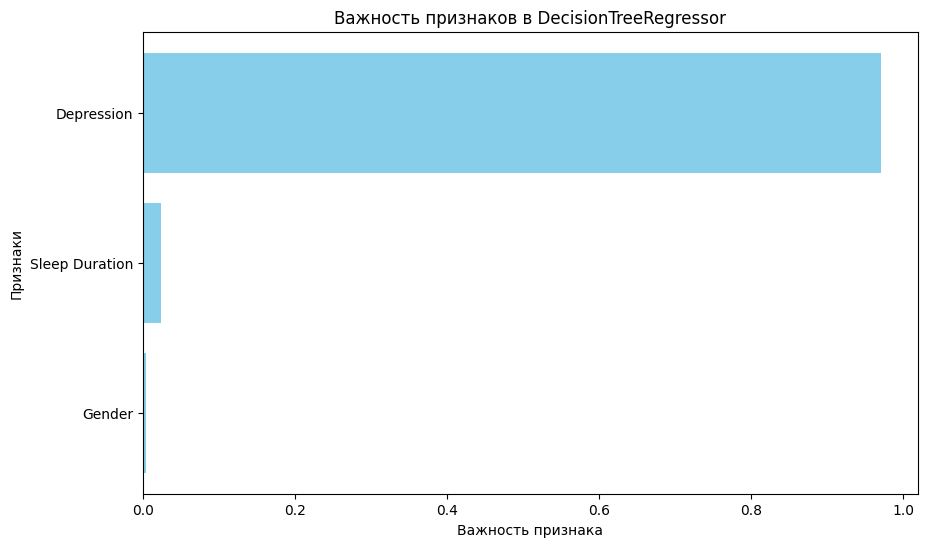

In [104]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Получение важности признаков
feature_importances = clf.feature_importances_

# Если у вас есть названия признаков
feature_names = X_train.columns if isinstance(X_train, pd.DataFrame) else [f"Feature {i}" for i in range(X_train.shape[1])]

# Создание DataFrame для удобства
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Построение графика
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Важность признака')
plt.ylabel('Признаки')
plt.title('Важность признаков в DecisionTreeRegressor')
plt.gca().invert_yaxis()  # Инвертируем ось Y для лучшей читаемости
plt.show()

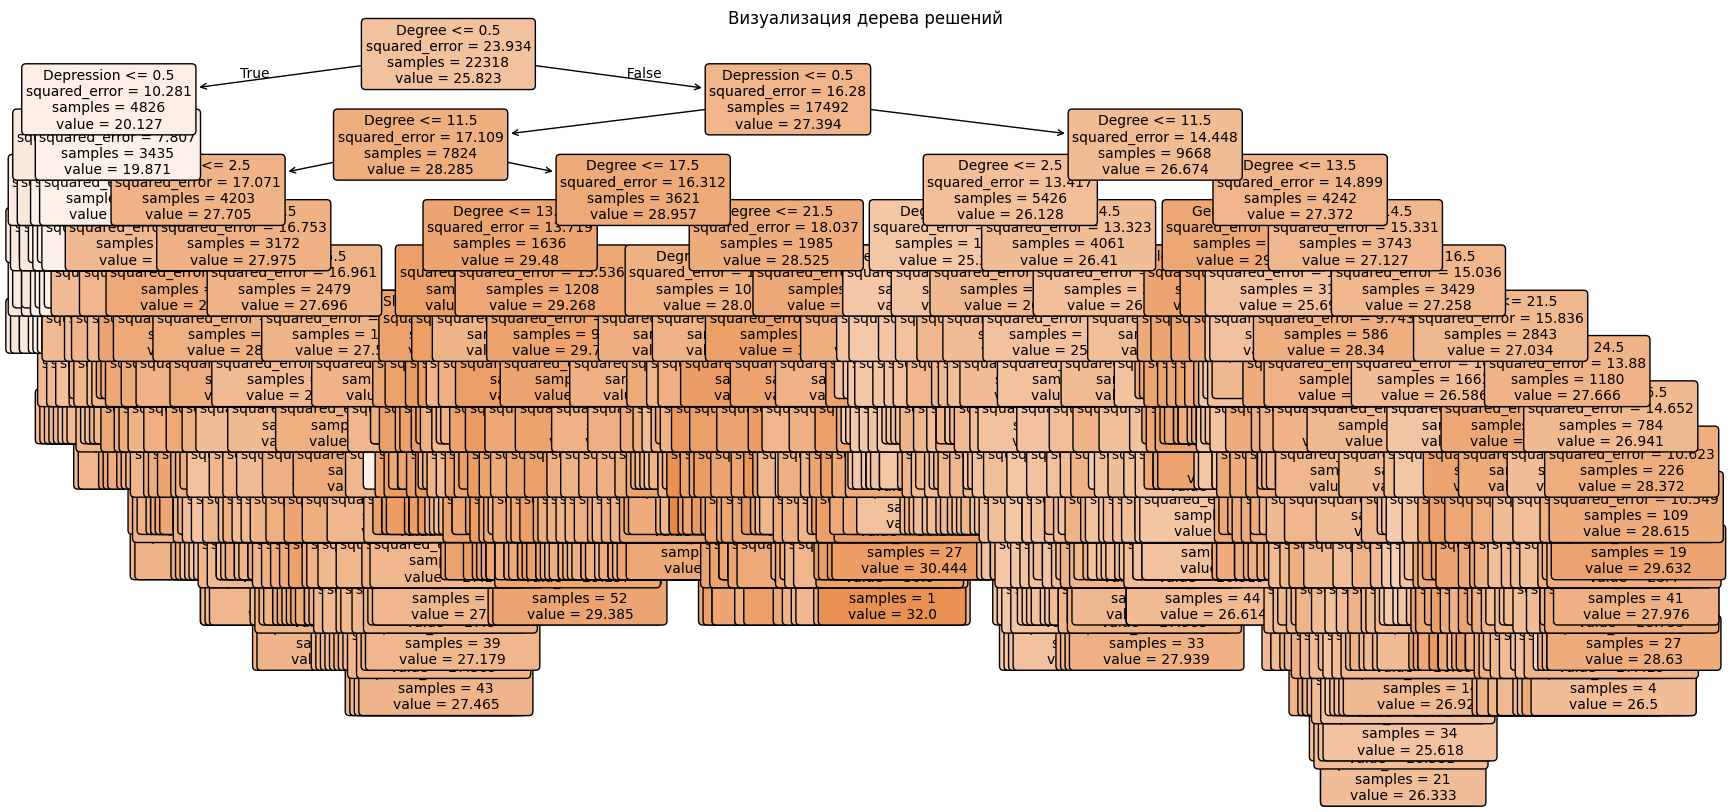

In [93]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Визуализация дерева решений
plt.figure(figsize=(20, 10))  # Увеличиваем размер графика для лучшей читаемости
plot_tree(
    clf,  # Ваш обученный DecisionTreeRegressor
    feature_names=X_train.columns if isinstance(X_train, pd.DataFrame) else None,  # Названия признаков
    filled=True,  # Раскрашиваем узлы в зависимости от значений
    rounded=True,  # Закругляем узлы для лучшей читаемости
    fontsize=10  # Размер шрифта
)
plt.title("Визуализация дерева решений")
plt.show()

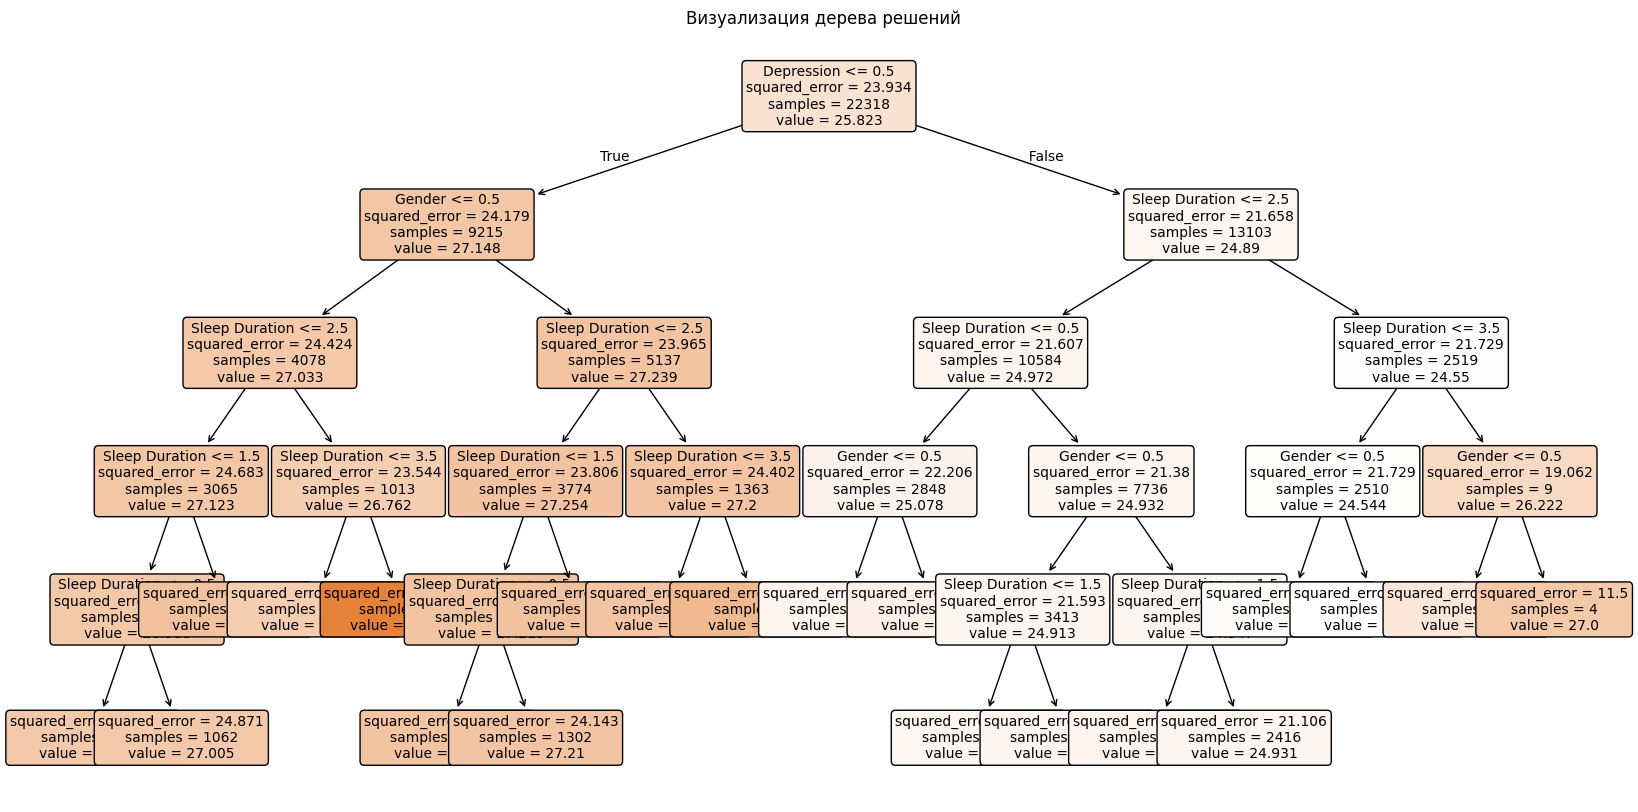

In [105]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Визуализация дерева решений
plt.figure(figsize=(20, 10))  # Увеличиваем размер графика для лучшей читаемости
plot_tree(
    clf,  # Ваш обученный DecisionTreeRegressor
    feature_names=X_train.columns if isinstance(X_train, pd.DataFrame) else None,  # Названия признаков
    filled=True,  # Раскрашиваем узлы в зависимости от значений
    rounded=True,  # Закругляем узлы для лучшей читаемости
    fontsize=10  # Размер шрифта
)
plt.title("Визуализация дерева решений")
plt.show()